## Laborator 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Generați un vector x[n] aleator de dimensiune N = 100. Calculați iterația x <- x * x de trei ori. Afișați cele patru grafice. Ce observați?

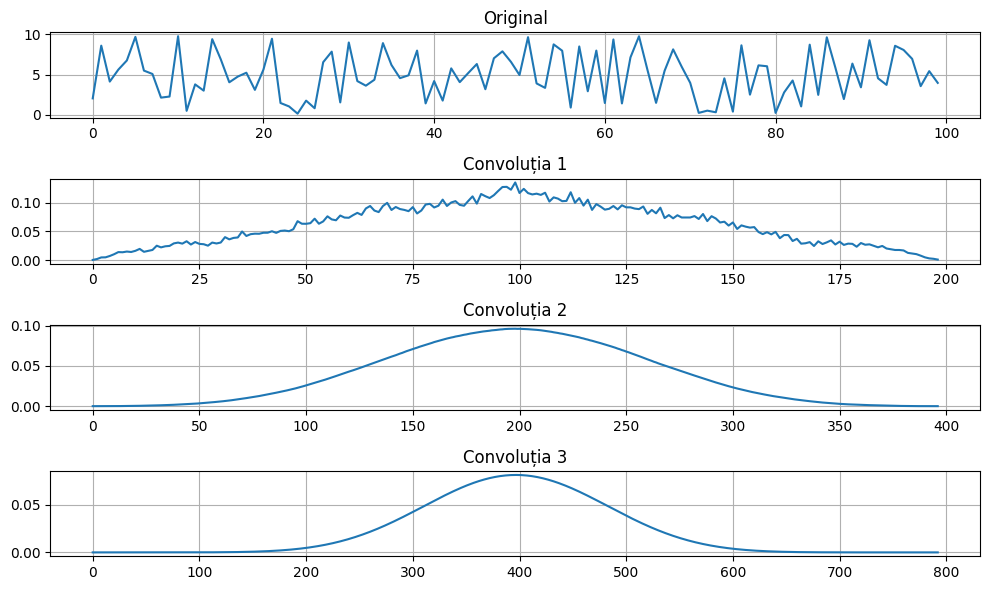

In [17]:
N = 100
x = np.random.rand(N) * 10
fig, axs = plt.subplots(4, 1, figsize=(10, 6))
axs[0].plot(x)
axs[0].set_title("Original")
axs[0].grid()


for i in range(1, 4):
    # Operația de convoluție
    x = np.convolve(x, x)

    # Normalizam cu norma L2
    x /= np.linalg.norm(x, 2)

    # Plotam
    axs[i].plot(x)
    axs[i].set_title(f"Convoluția {i}")
    axs[i].grid()

plt.tight_layout()
plt.show()


Ajungem la o Gaussiană

2. Vi se dau două polinoame p(x) și q(x) cu grad maxim N generate aleator cu coeficienți întregi. Calculați produsul lor r(x) = p(x)q(x) folosind convoluția: folosind înmulțirea polinoamelor directă și apoi folosind fft.

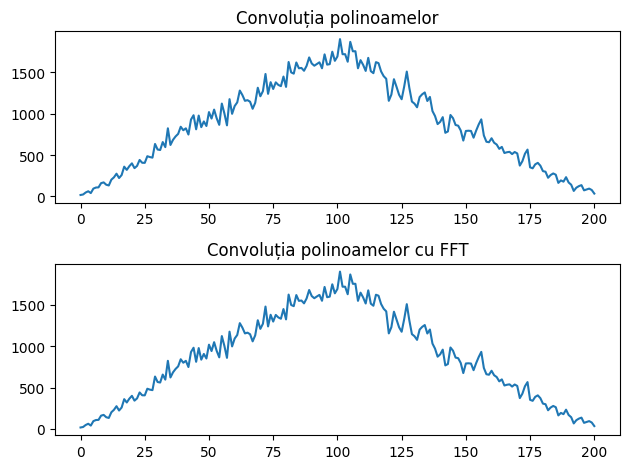

In [30]:
# Generarea coeficienților polinoamelor
p = np.random.randint(0, 10, N + 1)   # N+1 coeficienți pentru polinom de grad N
q = np.random.randint(0, 10, N + 1)

# Crearea polinoamelor
p = np.poly1d(p)
q = np.poly1d(q)

r = np.convolve(p, q)   # p * q

plt.subplot(2, 1, 1)
plt.plot(r)
plt.title("Convoluția polinoamelor")

# FFT
fft_r = np.fft.fft(p, n=2*N+1) * np.fft.fft(q, n=2*N+1)
r = np.fft.ifft(fft_r).real.astype(int)

plt.subplot(2, 1, 2)
plt.plot(r)
plt.title("Convoluția polinoamelor cu FFT")
plt.tight_layout()
plt.show()

3.

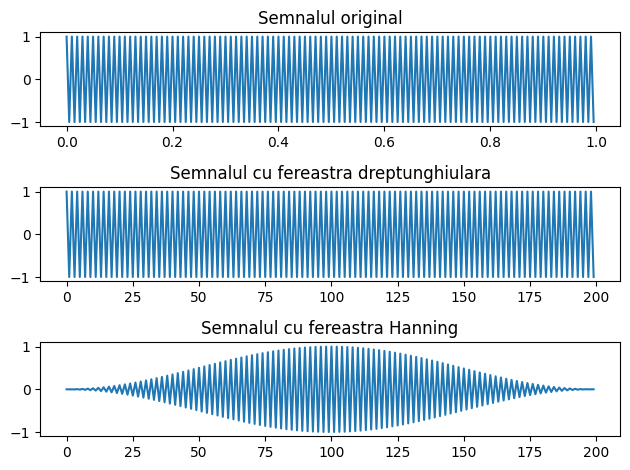

In [54]:
def dreptunghiular(Nw):
    return np.ones(Nw)

def hanning(Nw):
    return np.hanning(Nw)

# Parametrii semnalului
A = 1
f = 100
phi = 0

# Parametrii ferestrei
Nw = 200

# Generarea semnalului
t = np.linspace(0, 1, Nw, endpoint=False)
semnal = A * np.cos(2 * np.pi * f * t + phi)

# Afisarea grafic a sinusoidei trecute prin cele 2 tipuri de ferestre
plt.subplot(3, 1, 1)
plt.plot(t, semnal)
plt.title("Semnalul original")

plt.subplot(3, 1, 2)
plt.plot(semnal * dreptunghiular(Nw))
plt.title("Semnalul cu fereastra dreptunghiulara")

plt.subplot(3, 1, 3)
plt.plot(semnal * hanning(Nw))
plt.title("Semnalul cu fereastra Hanning")
plt.tight_layout()
plt.show()
